In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
              'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le = preprocessing.LabelEncoder()

outlook_encoded = le.fit_transform(Outlook)
outlook_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(outlook_mapping)

temp_encoded = le.fit_transform(Temperature)
temp_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(temp_mapping)

humidity_encoded = le.fit_transform(Humidity)
humidity_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(humidity_mapping)

wind_encoded = le.fit_transform(Wind)
wind_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(wind_mapping)

play_encoded = le.fit_transform(Play)
play_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(play_mapping)

{'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
{'Cool': 0, 'Hot': 1, 'Mild': 2}
{'High': 0, 'Normal': 1}
{'False': 0, 'True': 1}
{'No': 0, 'Yes': 1}


In [4]:
X = np.array([outlook_encoded,temp_encoded,humidity_encoded,wind_encoded])
X = X.T
print(X)

[[1 1 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [2 2 0 0]
 [2 0 1 0]
 [2 0 1 1]
 [0 0 1 1]
 [1 2 0 0]
 [1 0 1 0]
 [2 2 1 0]
 [1 2 1 1]
 [0 2 0 1]
 [0 1 1 0]
 [2 2 0 1]]


In [5]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)

X_train,x_test,Y_train,y_test = train_test_split(X,play_encoded,random_state=1)
print(X_train)

dtc.fit(X_train,Y_train)


[[1 2 1 1]
 [2 0 1 0]
 [1 1 0 1]
 [0 1 1 0]
 [1 1 0 0]
 [2 2 0 1]
 [2 2 1 0]
 [1 0 1 0]
 [0 2 0 1]
 [2 0 1 1]]


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [6]:
prediction = dtc.predict(x_test)
print("\n",x_test,"\n")
print(prediction)


 [[2 2 0 0]
 [1 2 0 0]
 [0 0 1 1]
 [0 1 0 0]] 

[0 0 0 1]


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,prediction)
print(cm)
accuracy = accuracy_score(y_test,prediction)
print(accuracy)

[[1 0]
 [2 1]]
0.5


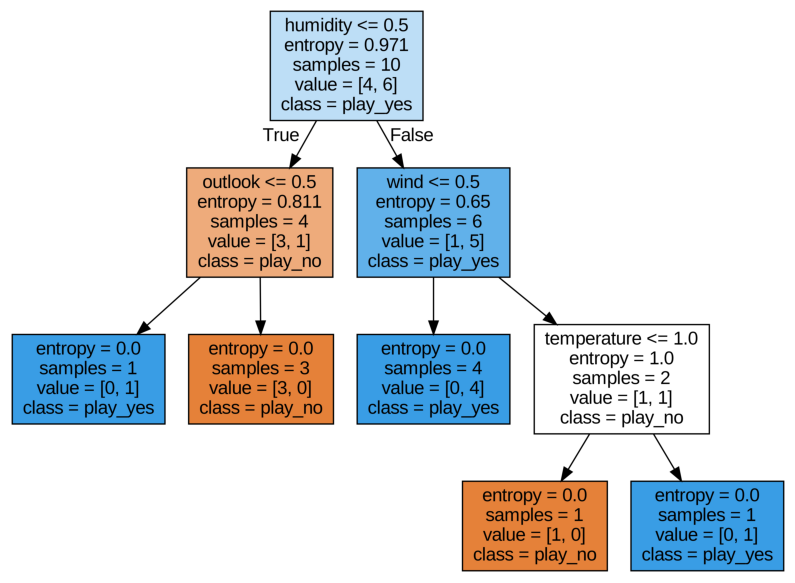

In [8]:
from sklearn.tree import export_graphviz

out_file = export_graphviz(dtc, out_file="/content/drive/MyDrive/ML/LAB5/Prediction_Weather",
                           feature_names=['outlook','temperature','humidity','wind'],
                            class_names=['play_no','play_yes'],filled=True)

from subprocess import call
call(['dot', '-Tpng', '/content/drive/MyDrive/ML/LAB5/Prediction_Weather', '-o', 'tree_entropy.png','-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

IRIS DATASET

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [10]:
X = iris.data
y = iris.target

dtc = DecisionTreeClassifier(random_state=1)

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=1)

dtc.fit(X_train,Y_train)



DecisionTreeClassifier(random_state=1)

In [11]:
y_predict = dtc.predict(x_test)

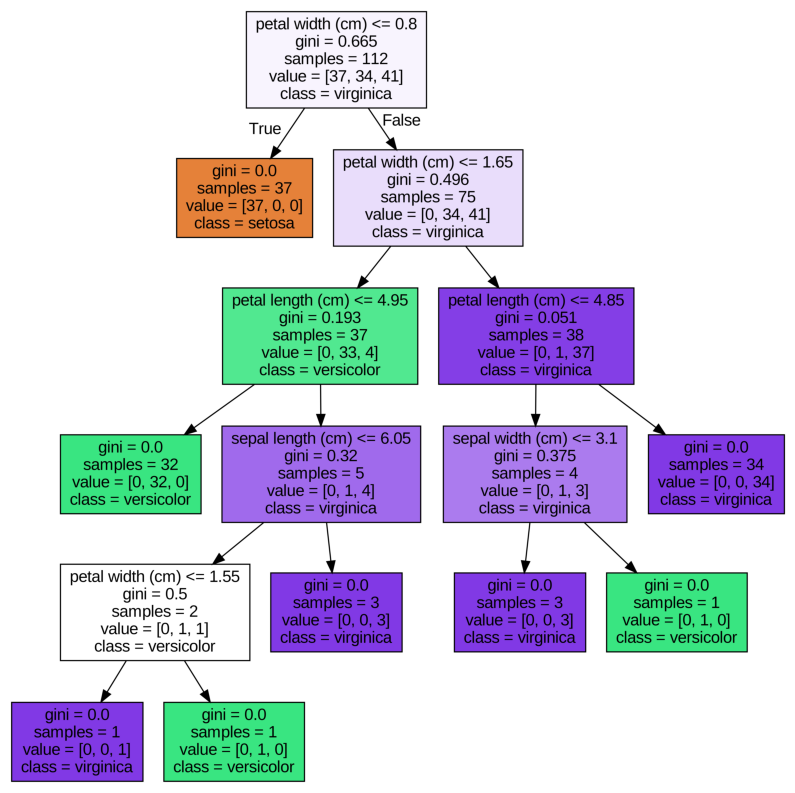

In [12]:
from sklearn.tree import export_graphviz

out_file = export_graphviz(dtc, out_file="/content/drive/MyDrive/ML/LAB5/Prediction_Iris",
                           feature_names=iris.feature_names,
                            class_names=iris.target_names,filled=True)

from subprocess import call
call(['dot', '-Tpng', '/content/drive/MyDrive/ML/LAB5/Prediction_Iris', '-o', 'iris_entropy.png','-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_entropy.png'))
plt.axis('off');
plt.show();

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158
